In [1]:
import sys
import json
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
sys.path.insert(0, './src')
from variational_gmm import VariationalGMM as vgmm
from synthetic import GMMDataGenerator as synth
import utils2 as util

pal = sns.light_palette((200, 75, 60), input="husl", as_cmap=True)

import numpy as np
import pandas as pd
from scipy.stats import norm
from matplotlib import pyplot as plt
from sklearn import mixture
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
import logging
logging.basicConfig(level=logging.DEBUG)

logger = logging.getLogger(__name__)
#np.random.seed(732839717)

sns.set(rc={"figure.figsize": (6, 6)})


In [3]:
M = 1

# Number of components per class.
K = 3

# Dimension of data.
D = 2

synthetic_gmm = synth(k=K, d=D)
print('Mu:\n', synthetic_gmm.get_mu())
print('Cov:\n', synthetic_gmm.get_cov())

Mu:
 [[-2.59051191  3.35298624]
 [ 2.59015812  5.3963904 ]
 [-1.40239083  4.02665889]]
Cov:
 [[[0.70099424 0.58328751]
  [0.58328751 1.36087661]]

 [[0.46509067 0.09024238]
  [0.09024238 0.12368124]]

 [[0.90284733 0.27926814]
  [0.27926814 1.18466485]]]


In [4]:
n_batchs = 1

X_batchs = []
C_batchs = []
for i in range(n_batchs):
    new_X, new_C = synthetic_gmm.generate(n=1000)
    X_batchs.append(new_X)

In [5]:
x , y = synthetic_gmm.generate(n=1000)
x

array([[-3.01357345,  2.88637268],
       [-2.1524443 ,  4.45358229],
       [-0.73346379,  4.46901895],
       ...,
       [ 2.41513295,  5.19519295],
       [-2.48142405,  2.26699381],
       [-2.06445201,  3.6547666 ]])

In [6]:
path_train = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Train_rrlyr-3.csv'
path_test = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Test_rrlyr-3.csv'
data_train = pd.read_csv(path_train).sample(1000)
data_test = pd.read_csv(path_test)
data = [data_test,data_train]
data = pd.concat(data)
del data_train['label']
del data_test['label']
del data['label']
data_test = util.clean_data(data_test)
data = util.clean_data(data)
data_test = util.pca_reduction(data_test)
data = util.pca_reduction(data)

In [7]:
n_batchs = 1

X_batchs = []
C_batchs = []

X = np.asanyarray(data)

for i in range(n_batchs):
    new_X = np.asanyarray(data.sample(1000))
    X_batchs.append(new_X)

In [8]:
result_list = []
debug_dict = {}
for i in range(1, n_batchs + 1):
    logger.info('Starting batch %d', i)
    X = X_batchs[i-1]
    vbGmm = vgmm(K, D, alpha_0=.01)
    vbGmm.fit(X, max_iter=50)
    result_list.append(vbGmm.get_checkpoint())


debug_dict = {'checkpoints': []}
for result in result_list:
    new_dict = {}
    for k, v in result['variational_parameters'].items():
        new_dict[k] = np.array_str(v) 
    new_dict['pi_k_expec'] = np.array_str(result['pi_k_expectation'])
    debug_dict['checkpoints'].append(new_dict)

with open('variational_gmm_results.json', 'w') as outfile:
    json.dump(debug_dict, outfile)

INFO:__main__:Starting batch 1
INFO:variational_gmm:Start fitting GMM in data
INFO:variational_gmm:Iteration: 0
INFO:variational_gmm:ELBO: -4966.010242
./src/variational_gmm.py:234: RuntimeWarning: divide by zero encountered in log
  * np.log(self.responsibilities))
./src/variational_gmm.py:234: RuntimeWarning: invalid value encountered in multiply
  * np.log(self.responsibilities))
INFO:variational_gmm:Iteration: 5
INFO:variational_gmm:ELBO: nan
INFO:variational_gmm:Iteration: 10
INFO:variational_gmm:ELBO: nan
INFO:variational_gmm:Iteration: 15
INFO:variational_gmm:ELBO: nan
INFO:variational_gmm:Iteration: 20
INFO:variational_gmm:ELBO: nan
INFO:variational_gmm:Iteration: 25
INFO:variational_gmm:ELBO: nan
INFO:variational_gmm:Iteration: 30
INFO:variational_gmm:ELBO: nan
INFO:variational_gmm:Iteration: 35
INFO:variational_gmm:ELBO: nan
INFO:variational_gmm:Iteration: 40
INFO:variational_gmm:ELBO: nan
INFO:variational_gmm:Iteration: 45
INFO:variational_gmm:ELBO: nan
INFO:variational_gmm:

In [9]:
debug_dict

{'checkpoints': [{'W_k': '[[[0.01312014 0.00516054]\n  [0.00516054 0.00418738]]\n\n [[0.00057993 0.00044816]\n  [0.00044816 0.00112789]]\n\n [[0.00076316 0.00034391]\n  [0.00034391 0.00044144]]]',
   'nu_k': '[505.70757984  44.98295365 458.30946654]',
   'alpha_k': '[502.71757984  41.99295365 455.31946654]',
   'beta_k': '[502.70757984  41.98295365 455.30946654]',
   'm_k': '[[-1.71044476 -0.06317904]\n [ 6.42892382  3.69432091]\n [ 1.03458261 -0.30893968]]',
   'pi_k_expec': '[1.005395   0.08397339 0.91060162]'}]}

0
1
(1000, 2)
(3, 2)
(3, 2, 2)


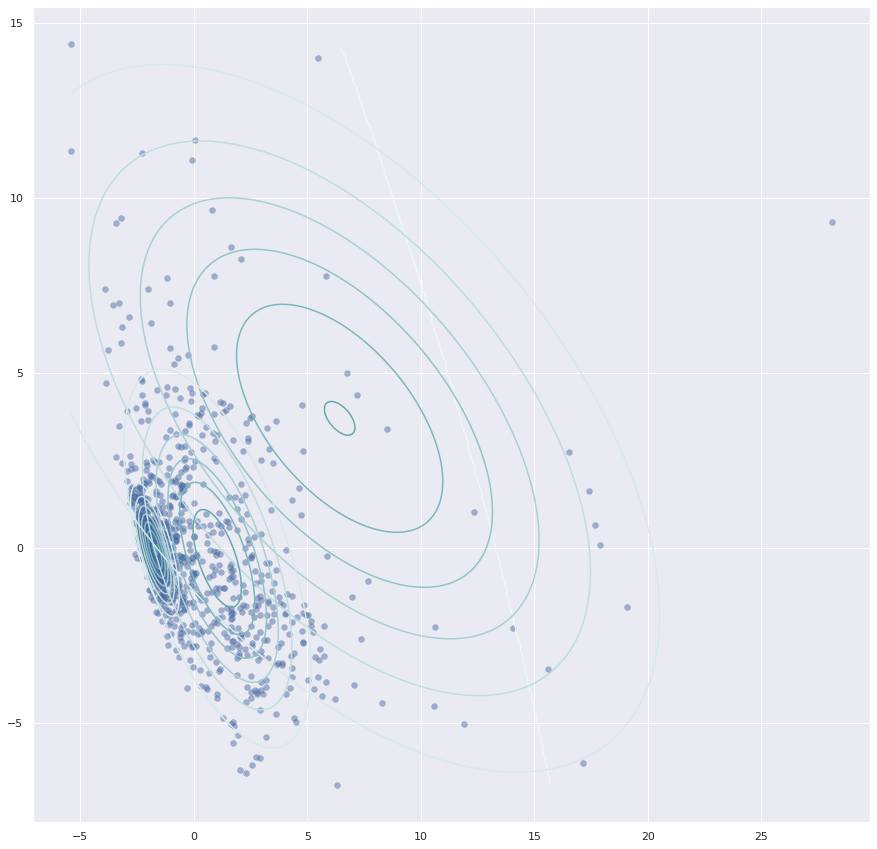

In [11]:
cols = 1
rows = 1
f, ax = plt.subplots(rows, cols, figsize=(15, 15))
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        print(index)
        print(n_batchs)
        if index < n_batchs: 
            X = X_batchs[index]
            variational_params = result_list[index]['variational_parameters']
            m_k = variational_params['m_k']
            nu_k = variational_params['nu_k']
            W_k = variational_params['W_k']      
            print(X.shape)
            print(m_k.shape)    
            COV = np.linalg.inv(nu_k[:, np.newaxis, np.newaxis] * W_k)           
            print(COV.shape)
            util.plot_gmm(X, m_k, COV) # ax=ax[i, j]
plt.show()